### 1. Load and inspect data from csv

In [1]:
import pandas as pd
import numpy as np
student_data = pd.read_csv('../data/students.csv')
# student_data.head()

### 2. Create DataFrame and add records

In [3]:
df = pd.DataFrame(student_data)

df.loc[len(df)] = {"Name": "Kevin", "Age": 16, "Grade": "B", "Score": 80}
df.loc[len(df)] = {"Name": "Clarence", "Age": 18, "Grade": np.nan, "Score": 72}
df.loc[len(df)] = {"Name": "Samantha", "Age": 16, "Grade": "B", "Score": 84}

df


### 1b. Split student data and add student_id column

In [4]:
df.loc[df["Age"] > 0, ["student_id"]] = df.index
df["student_id"] = df["student_id"].astype(int)
df_scores = df[["student_id", "Score"]]
df_scores.to_csv("../data/student_scores.csv", index=False)

# print(df)
# print(df_scores)

merged_df = pd.merge(df, df_scores, how="inner", on="student_id")
merged_df.rename(columns={"Score_x": "Score"}, inplace=True)
merged_df.drop(["Score_y"], axis=1, inplace=True)
merged_df

,Name,Age,Grade,Score,student_id
0,Alice,17,A,88.0,0
1,Bob,19,B,NaN,1
2,Charlie,18,A,91.0,2
3,David,21,C,75.0,3
4,Eva,20,B,84.0,4
5,Frank,22,C,77.0,5
6,Grace,17,A,93.0,6
7,Heidi,23,C,NaN,7
8,Ivan,19,B,86.0,8
9,Judy,20,A,89.0,9


### 3. Avg/mean/std and creating pivot tables (Counting/statistics)

In [453]:
print(f"Average: {merged_df['Score'].mean()}")
print(f"Median: {merged_df['Score'].median()}")
print(f"Standard Deviation: {merged_df['Score'].std(ddof=0)}")
# NOTE - Research: standard deviation, IQR)


Average: 83.54545454545455
Median: 84.0
Standard Deviation: 6.485839629722535


In [6]:
merged_df.pivot_table(values='Score', index='Grade', aggfunc='count')
# NOTE - exclude columns arg to display 2D data

,Score
Grade,
A,4
B,2
C,2


In [12]:
# Same results using function to clean/create pivot from original df
def count_grades(dataframe: pd.DataFrame, col_name: str) -> pd.DataFrame:
    return dataframe.dropna()[[f"{col_name}"]].value_counts()

count_grades(df, 'Grade')

Grade
A        4
B        2
C        2
Name: count, dtype: int64

In [7]:
merged_df.pivot_table(values='Score', index='Grade', columns='Age', aggfunc='mean')

Age,17,18,19,20,21,22
Grade,,,,,,
A,90.5,91.0,NaN,89.0,NaN,NaN
B,NaN,NaN,86.0,84.0,NaN,NaN
C,NaN,NaN,NaN,NaN,75.0,77.0


### 4. Filter students over 18

In [405]:
above_18 = merged_df[merged_df['Age'] > 18]
above_18

,Name,Age,Grade,Score
1,Bob,19,B,NaN
3,David,21,C,75.0
4,Eva,20,B,84.0
5,Frank,22,C,77.0
7,Heidi,23,C,NaN
8,Ivan,19,B,86.0
9,Judy,20,A,89.0


### 4b. Sort by grade descending

In [5]:
merged_df.sort_values(["Grade"], ascending=True) # Ascending true because highest grade("A") has the lowest ASCII value
# NOTE - Inplace arg is the same as reassignment

,Name,Age,Grade,Score,student_id
0,Alice,17,A,88.0,0
2,Charlie,18,A,91.0,2
6,Grace,17,A,93.0,6
9,Judy,20,A,89.0,9
1,Bob,19,B,NaN,1
4,Eva,20,B,84.0,4
8,Ivan,19,B,86.0,8
3,David,21,C,75.0,3
5,Frank,22,C,77.0,5
7,Heidi,23,C,NaN,7


### 5. Handle missing data

In [16]:
merged_df.fillna({"Score": merged_df["Score"].mean()}, inplace=True)
merged_df.dropna(axis=0, how="any", subset=["Grade"], inplace=True)
print(merged_df)

      Name  Age Grade   Score  student_id
0    Alice   17     A  88.000           0
1      Bob   19     B  85.375           1
2  Charlie   18     A  91.000           2
3    David   21     C  75.000           3
4      Eva   20     B  84.000           4
5    Frank   22     C  77.000           5
6    Grace   17     A  93.000           6
7    Heidi   23     C  85.375           7
8     Ivan   19     B  86.000           8
9     Judy   20     A  89.000           9


<Axes: title={'center': 'Score Distribution'}, ylabel='Frequency'>

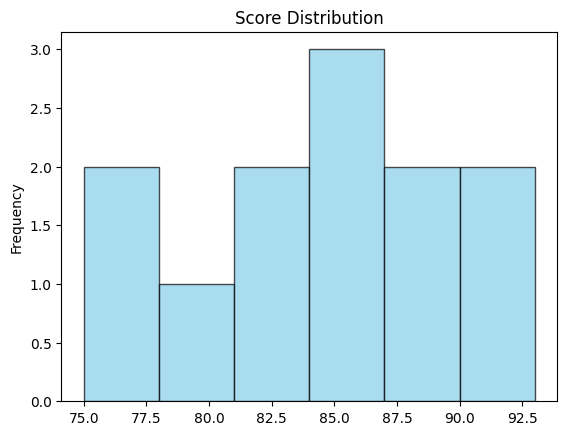

In [426]:
df['Score'].plot.hist(
    bins=6,               # Number of bins
    alpha=0.7,            # Transparency (0 to 1)
    color='skyblue',      # Bar color
    edgecolor='black',    # Border color for bars
    title='Score Distribution'  # Title of the plot
)